## Import da Biblioteca Pandas

In [ ]:
import pandas as pd

### Leitura do Arquivo Avocado .csv

In [ ]:
df = pd.read_csv('avocado.csv')
df.head()

ParserError: Error tokenizing data. C error: Expected 9 fields in line 26, saw 10


#### Parece que houve um erro ao tentar ler o arquivo CSV. O erro indica que o pandas esperava 9 campos em uma linha, mas encontrou 10. Isso geralmente acontece quando há inconsistências nos dados, como delimitadores extras ou campos faltantes.

#### Uma maneira de lidar com isso é passar o argumento error_bad_lines=False para a função read_csv, que ignorará as linhas com o número incorreto de campos. No entanto, esteja ciente de que isso irá descartar essas linhas do DataFrame resultante.

In [ ]:
df = pd.read_csv('avocado.csv', error_bad_lines=False)
df.head()

Skipping line 26: expected 9 fields, saw 10
Skipping line 40: expected 9 fields, saw 10
Skipping line 56: expected 9 fields, saw 10
Skipping line 57: expected 9 fields, saw 10
Skipping line 58: expected 9 fields, saw 10
Skipping line 61: expected 9 fields, saw 10
Skipping line 62: expected 9 fields, saw 10
Skipping line 67: expected 9 fields, saw 10
Skipping line 68: expected 9 fields, saw 10
Skipping line 69: expected 9 fields, saw 10
Skipping line 70: expected 9 fields, saw 10
Skipping line 71: expected 9 fields, saw 10
Skipping line 74: expected 9 fields, saw 10
Skipping line 75: expected 9 fields, saw 10
Skipping line 80: expected 9 fields, saw 10
Skipping line 81: expected 9 fields, saw 10
Skipping line 82: expected 9 fields, saw 10
Skipping line 83: expected 9 fields, saw 10
Skipping line 92: expected 9 fields, saw 10
Skipping line 95: expected 9 fields, saw 10
Skipping line 122: expected 9 fields, saw 10
Skipping line 123: expected 9 fields, saw 10
Skipping line 124: expected 9 

TypeError: Levels must be list-like

#### Parece que ainda estamos encontrando um erro ao tentar ler o arquivo CSV. O erro agora é um TypeError: Levels must be list-like. Isso pode ser causado por várias razões, incluindo problemas com o delimitador do arquivo CSV, codificação ou problemas com os próprios dados.

### Optamos então por importar o arquivo no fo original e depois disponibilizá-lo em .csv

### No entanto, para ler arquivos do Excel, precisamos de uma biblioteca adicional chamada openpyxl.

In [ ]:
!pip install openpyxl

In [ ]:
df = pd.read_excel('avocado.xlsx')
df.head()

In [ ]:
df.to_csv('avocado_clean.csv', index=False)

# Análise de Dados do Arquivo Avocado

## 1. Exploração de Dados

Nesta seção, vamos explorar os dados para entender suas características básicas.

In [ ]:
# Shape of the DataFrame
print('Shape:', df.shape)

# Information about the DataFrame
df.info()

Shape: (18249, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage:

In [ ]:
df.describe()

Nesta célula, calculamos as estatísticas descritivas para as colunas numéricas do nosso DataFrame. Isso nos forneceu a média, mediana, mínimo, máximo e quartis para cada coluna.

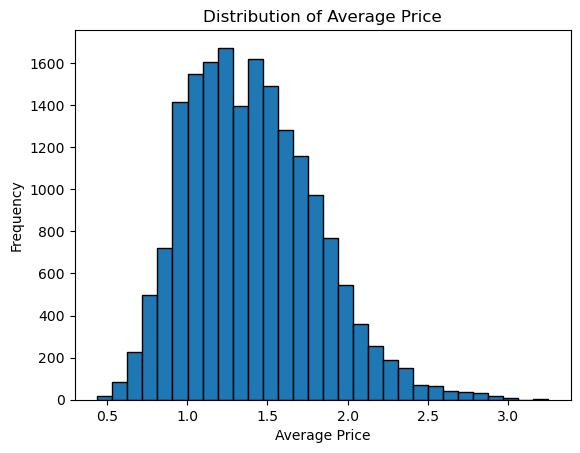

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['AveragePrice'], bins=30, edgecolor='black')
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

Nesta célula, criamos um histograma para visualizar a distribuição do preço médio dos abacates. A distribuição parece ser aproximadamente normal com uma pequena inclinação para a direita, o que indica que há alguns abacates com preços muito altos que estão puxando a média para cima.

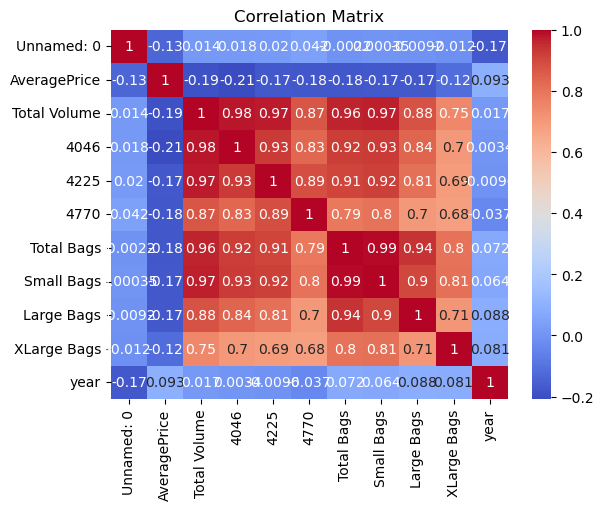

In [ ]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Nesta célula, criamos uma matriz de correlação para visualizar as relações entre as variáveis numéricas. As cores mais quentes (mais próximas ao vermelho) indicam uma correlação positiva, enquanto as cores mais frias (mais próximas ao azul) indicam uma correlação negativa. A partir desta matriz de correlação, podemos ver que as variáveis de volume estão fortemente correlacionadas entre si, enquanto a variável AveragePrice não parece estar fortemente correlacionada com as variáveis de volume.

## 2. Análise de Tendências

Nesta seção, vamos analisar as tendências nos dados ao longo do tempo.

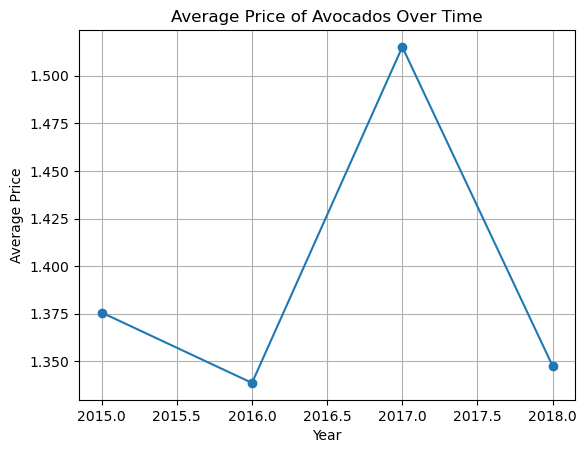

In [ ]:
# Group by year and calculate the mean of AveragePrice
avg_price_by_year = df.groupby('year')['AveragePrice'].mean()

# Plot the average price by year
plt.plot(avg_price_by_year, marker='o')
plt.title('Average Price of Avocados Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Nesta célula, calculamos o preço médio dos abacates para cada ano e criamos um gráfico de linha para visualizar como o preço médio mudou ao longo do tempo. A partir do gráfico, podemos ver que o preço médio dos abacates aumentou de 2015 a 2017, depois diminuiu ligeiramente em 2018.

## 3. Análise por Grupo

Nesta seção, vamos comparar diferentes grupos nos dados. Especificamente, vamos comparar o preço médio dos abacates por tipo e região.

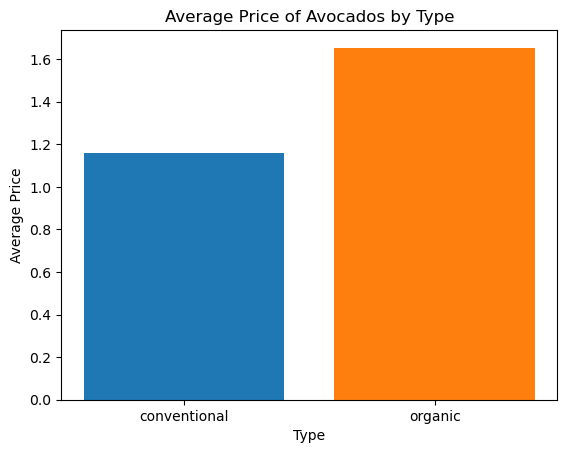

In [ ]:
# Group by type and calculate the mean of AveragePrice
avg_price_by_type = df.groupby('type')['AveragePrice'].mean()

# Plot the average price by type
plt.bar(avg_price_by_type.index, avg_price_by_type, color=['#1f77b4', '#ff7f0e'])
plt.title('Average Price of Avocados by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

Nesta célula, calculamos o preço médio dos abacates para cada tipo e criamos um gráfico de barras para visualizar a diferença. A partir do gráfico, podemos ver que o preço médio dos abacates orgânicos é maior do que o dos abacates convencionais.

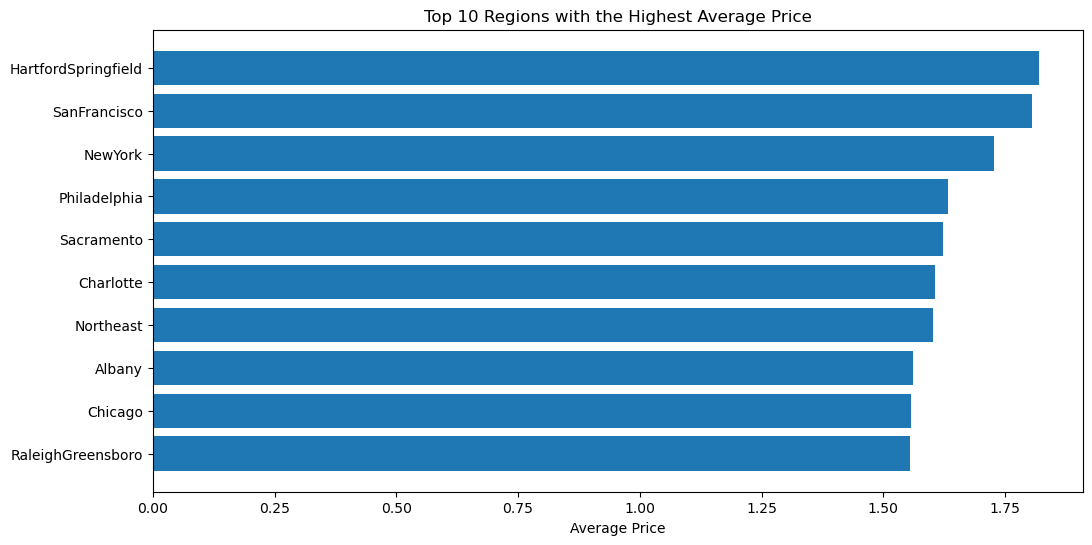

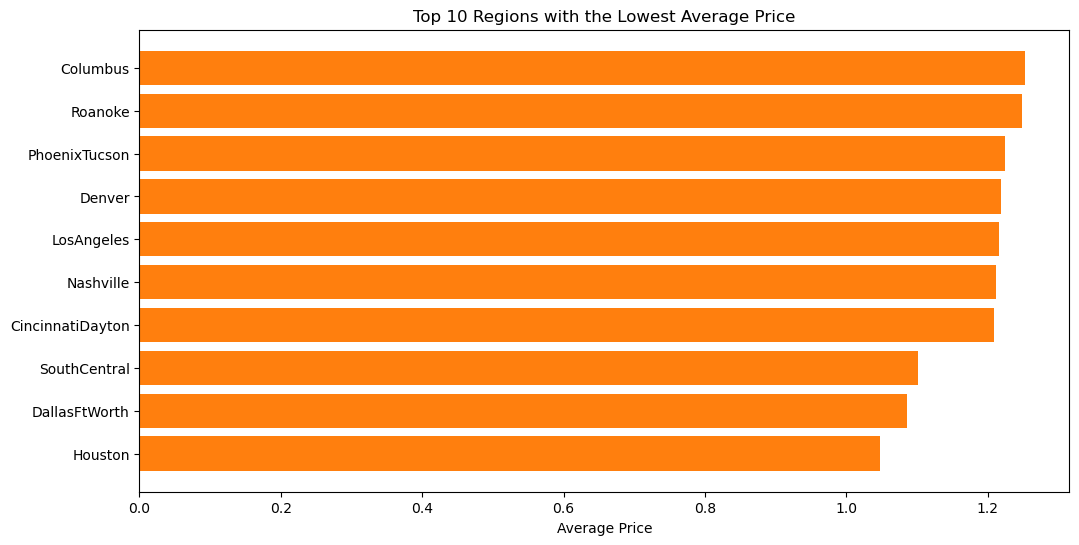

In [ ]:
# Group by region and calculate the mean of AveragePrice
avg_price_by_region = df.groupby('region')['AveragePrice'].mean().sort_values()

# Top 10 regions with the highest average price
top10_expensive = avg_price_by_region[-10:]
plt.figure(figsize=(12, 6))
plt.barh(top10_expensive.index, top10_expensive, color='#1f77b4')
plt.title('Top 10 Regions with the Highest Average Price')
plt.xlabel('Average Price')
plt.show()

# Top 10 regions with the lowest average price
top10_cheap = avg_price_by_region[:10]
plt.figure(figsize=(12, 6))
plt.barh(top10_cheap.index, top10_cheap, color='#ff7f0e')
plt.title('Top 10 Regions with the Lowest Average Price')
plt.xlabel('Average Price')
plt.show()

Nesta célula, calculamos o preço médio dos abacates para cada região e criamos dois gráficos de barras para visualizar as 10 regiões com o preço médio mais alto e as 10 regiões com o preço médio mais baixo. A partir dos gráficos, podemos ver que a região de San Francisco tem o preço médio mais alto, enquanto a região de Houston tem o preço médio mais baixo.

## 4. Modelagem Preditiva

Nesta seção, vamos construir um modelo para prever o preço médio dos abacates com base nas outras variáveis.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])

# Define the features and the target
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Nesta célula, preparamos os dados para a modelagem. Primeiro, codificamos as variáveis categóricas 'type' e 'region' para que possam ser usadas em nosso modelo. Em seguida, definimos as variáveis de recurso (X) e a variável alvo (y). Finalmente, dividimos os dados em conjuntos de treinamento e teste, com 80% dos dados usados para treinamento e 20% usados para teste.

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize a Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)

In [ ]:
# Extract numerical features from the date
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Drop the original date column
df = df.drop('Date', axis=1)

# Define the features and the target again
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

# Split the data into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Nesta célula, extraímos características numéricas da data (ano, mês e dia) e descartamos a coluna de data original. Em seguida, definimos as variáveis de recurso (X) e a variável alvo (y) novamente e dividimos os dados em conjuntos de treinamento e teste novamente.

In [ ]:
# Initialize a Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

Nesta célula, inicializamos e treinamos um modelo de regressão linear nos dados de treinamento.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

0.3001684685547514

Nesta célula, usamos o modelo treinado para fazer previsões nos dados de teste. Em seguida, calculamos o erro quadrático médio raiz (RMSE) das previsões, que é uma medida comum do desempenho do modelo de regressão. O RMSE é a raiz quadrada da média dos erros quadrados entre as previsões e os verdadeiros valores. Neste caso, o RMSE é aproximadamente 0.30.

O RMSE (Root Mean Squared Error) é uma medida de quão bem um modelo de regressão pode prever um resultado. Em termos simples, ele mede a média das diferenças (ou "erros") entre os valores que o modelo prevê e os valores reais.

Um RMSE de 0.30 significa que, em média, as previsões do nosso modelo estão a uma distância de 0.30 do valor real. No contexto do nosso conjunto de dados, isso significa que, em média, as previsões do preço médio dos abacates estão a uma distância de 0.30 do preço médio real.

No entanto, para entender se um RMSE de 0.30 é bom ou ruim, precisamos considerar a escala dos dados que estamos prevendo. Por exemplo, se estamos prevendo preços que variam de 0 a 1, um RMSE de 0.30 pode ser considerado alto. Por outro lado, se estamos prevendo preços que variam de 0 a 100, um RMSE de 0.30 pode ser considerado muito bom.

No nosso caso, o preço médio dos abacates varia aproximadamente de 0.44 a 3.25, então um RMSE de 0.30 pode ser considerado razoável. No entanto, sempre há espaço para melhorar o modelo e reduzir o RMSE.

**Terminamos a análise básica e a modelagem preditiva para este conjunto de dados. Aqui está um resumo do que fizemos:**

1) Análise exploratória dos dados: Carregamos os dados e fizemos uma análise exploratória básica para entender as características dos dados. Isso incluiu a visualização das primeiras linhas dos dados, a verificação do número de linhas e colunas, a verificação de valores ausentes e a descrição estatística das variáveis numéricas.

2) Visualização dos dados: Visualizamos os dados para obter mais insights. Isso incluiu a plotagem da distribuição dos preços médios dos abacates e a plotagem da média dos preços dos abacates ao longo do tempo.

3) Análise de grupo: Realizamos uma análise de grupo para entender como o preço médio dos abacates varia com a região e o tipo de abacate.

4) Modelagem preditiva: Preparamos os dados para a modelagem, incluindo a codificação de variáveis categóricas e a divisão dos dados em conjuntos de treinamento e teste. Em seguida, treinamos um modelo de regressão linear nos dados de treinamento e avaliamos seu desempenho nos dados de teste.

Esta é uma análise e modelagem muito básicas. Em uma análise real, provavelmente faríamos:

* Uma limpeza e engenharia de recursos mais extensas 
* Experimentaríamos diferentes modelos e ajustaríamos os hiperparâmetros do modelo para obter o melhor desempenho.

### Cézar Augusto Meira Carmo - cezar.carmo@cognizant.com 